#### Name: Rishita Mote
#### UID: 2018130029
#### Batch B

### **Experiment 1**
#### Objective: To carry out linear regression (including multiple regression) and build a regression model using Python Platform. 


#Part A
#####Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

In [ ]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

###Load the dataset (Use pandas )

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
dataset=pd.read_csv('drive/MyDrive/Data Science/Lab/horse.csv')
df=pd.DataFrame(dataset)

Mounted at /content/drive


In [ ]:
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [ ]:
df.shape

(299, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

###Data Preprocessing (Handling NA values)

In [ ]:
#columns having more than 40% of the null values 
null_col=df.columns[df.isna().mean() > 0.40]
null_col
#drop columns with more than 40% null values
df=df.drop(columns= null_col)
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,absent,distend_small,44.0,NaN,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,decreased,distend_large,60.0,6.8,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,absent,distend_small,50.0,6.0,lived,yes,2208,0,0,yes


In [ ]:
#Categorize the features into categorical and numerical
data_types=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_col=[]
categorical_col=[]
features=df.columns.values.tolist()
for i in features:
  if df[i].dtype in data_types:
    numerical_col.append(i)
  else: 
    categorical_col.append(i)

print("Numerical columns are: ", numerical_col)
print("Categorical columns are: " , categorical_col)


Numerical columns are:  ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']
Categorical columns are:  ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data']


In [ ]:
#filling NA values of numerical features with median value
for col in numerical_col:
    df.loc[(df["outcome"] == 'died') & (df[col].isnull()), col] = df[df["outcome"] == 'died'][col].median()
    df.loc[(df["outcome"] == 'euthanized') & (df[col].isnull()), col] = df[df["outcome"] == 'euthanized'][col].median()
    df.loc[(df["outcome"] == 'lived') & (df[col].isnull()), col] = df[df["outcome"] == 'lived'][col].median()


In [ ]:
#filling NA values of categorical features with mode value
for col in categorical_col:
    df.loc[(df["outcome"] == 'died') & (df[col].isnull()), col] = df[df["outcome"] == 'died'][col].mode()[0]
    df.loc[(df["outcome"] == 'euthanized') & (df[col].isnull()), col] = df[df["outcome"] == 'euthanized'][col].mode()[0]
    df.loc[(df["outcome"] == 'lived') & (df[col].isnull()), col] = df[df["outcome"] == 'lived'][col].mode()[0]

In [ ]:
#label encoder to convert categorical values to numeric values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,125,24,17,16,1,3,4,2,2,0,2,2,2,1,0,21,36,0,0,55,0,0,0
1,1,0,214,31,28,9,1,3,4,1,3,0,3,2,2,0,4,26,77,1,0,13,0,0,0
2,0,0,140,22,3,13,2,2,5,1,3,2,1,2,2,3,3,8,19,2,0,0,0,0,1
3,1,1,264,30,50,36,0,2,2,2,1,0,2,0,0,1,0,24,24,0,1,13,0,0,1
4,0,0,133,11,34,20,1,3,2,2,2,2,0,2,2,0,0,49,26,0,0,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,174,19,39,33,0,3,4,2,1,0,0,2,2,0,0,32,62,1,0,25,0,0,0
295,0,0,15,10,20,13,1,1,4,2,4,2,0,1,2,0,1,20,53,1,1,13,0,0,1
296,1,0,84,13,20,17,0,3,4,1,4,0,0,2,2,1,0,37,20,0,1,25,0,0,0
297,1,0,155,4,33,13,1,3,5,1,3,2,0,1,2,0,1,26,12,2,1,13,0,0,1


###Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

In [ ]:
#! pip uninstall pandas-profiling

In [ ]:
#!pip install pandas-profiling[notebook]

In [ ]:
#!pip show pandas-profiling

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)
#profile.to_notebook_iframe()

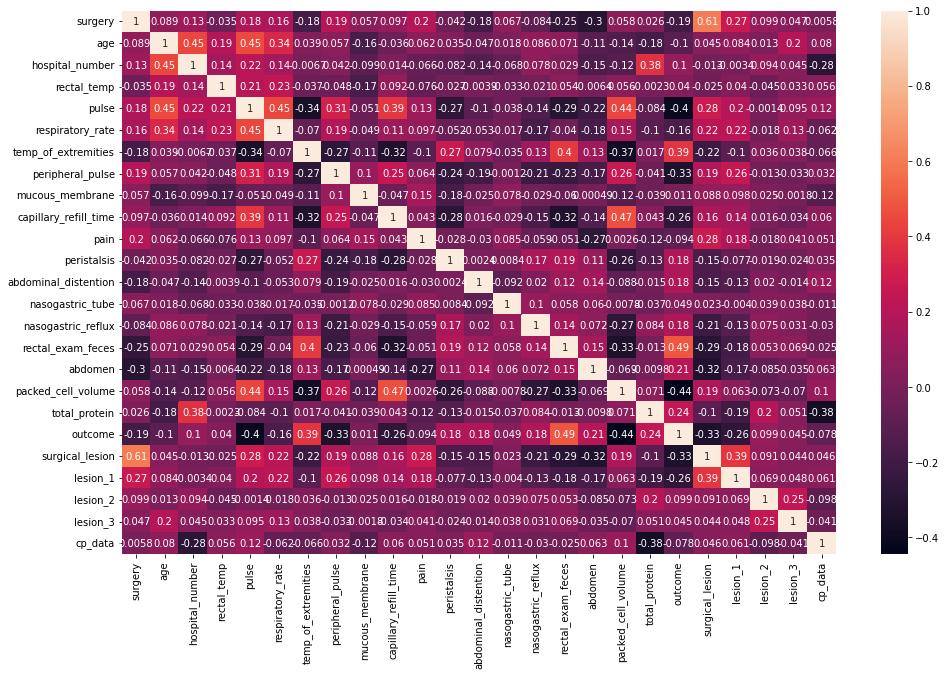

In [ ]:
#correlation graph
%matplotlib inline
plt.figure(figsize = (16,10))
sb.heatmap(df.corr(), annot=True)

ValueError: ignored

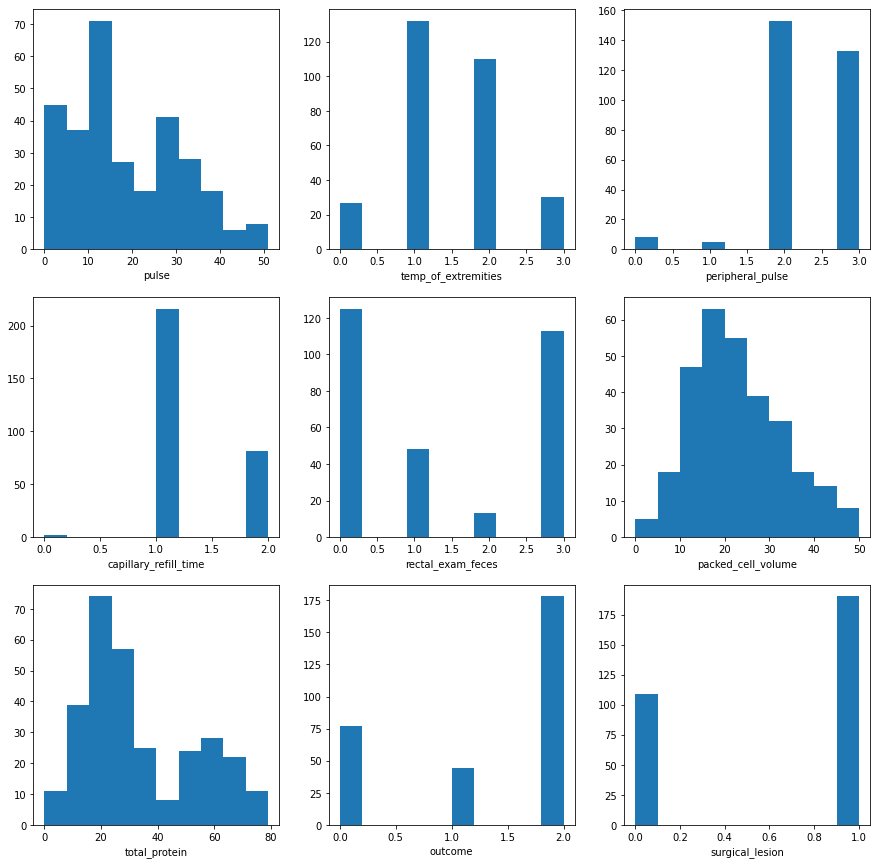

In [ ]:
plt.figure(figsize=(15,15))
col = df.columns
for i in range(0,len(col)):
    plt.subplot(len(col)//3,3,i+1)
    plt.hist(df[col[i]]);
    plt.xlabel(col[i])

In [ ]:
# removing columns having less correlation with outcome feature
correlation_data = df.corr()
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.24:
        df = df.drop([correlation_values.index[col]], axis=1)
df

,pulse,temp_of_extremities,peripheral_pulse,capillary_refill_time,rectal_exam_feces,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1
0,17,1,3,2,1,21,36,0,0,55
1,28,1,3,1,0,26,77,1,0,13
2,3,2,2,1,3,8,19,2,0,0
3,50,0,2,2,1,24,24,0,1,13
4,34,1,3,2,0,49,26,0,0,36
...,...,...,...,...,...,...,...,...,...,...
294,39,0,3,2,0,32,62,1,0,25
295,20,1,1,2,0,20,53,1,1,13
296,20,0,3,1,1,37,20,0,1,25
297,33,1,3,1,0,26,12,2,1,13


###Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop(columns='outcome')
Y = df[['outcome']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)



In [ ]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Build the model (use scikit learn)

In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Summarise the model

In [ ]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Prediction

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [ ]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.8333333333333334


### Evaluate the model

In [ ]:
#classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.60      0.43      0.50         7
           2       0.82      1.00      0.90        33

    accuracy                           0.83        60
   macro avg       0.79      0.71      0.73        60
weighted avg       0.83      0.83      0.82        60

[[14  2  4]
 [ 1  3  3]
 [ 0  0 33]]


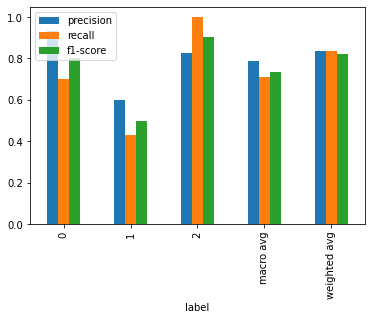

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, y_pred.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

### Tuning

In [ ]:
LR = LogisticRegression(multi_class='multinomial')
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X , Y)

Fitting 5 folds for each of 735 candidates, totalling 3675 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=sag;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.593 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.633 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.683 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.593 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=sag;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=sag;, score=0.650 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=sag

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=libli

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.683 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.683 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.746 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.617 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.600 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.593 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.683 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.700 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.617 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.683 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.633 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.700 total time=   0.1s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.700 total time=   0.1s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.650 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=saga;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=elasticnet, solver

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=sag;, score=nan tota

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, pe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.633 total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.695 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.800 total time=   0.2s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, score=nan total 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.633 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.712 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.780 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.650 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.700 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.667 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.650 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 4/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=elasticnet, solver=sag;, score=nan total time=   0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.667 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.650 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.712 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.817 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio


[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.767 tota

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.3s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=sag;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.780 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.3s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.800 tot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, p

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.767 total time=   0.0s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.800 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.800 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.800 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=sag;, score=0.797 total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh


[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=na

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.2s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=e

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.800 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=e

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.780 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.763 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.763 total time=   0.1s
[CV 1/5] END C=1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, pe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.1s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.797 total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.746 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=sag;, score=0.746 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penal

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.733 total time=   0.1s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.746 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.2s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=10, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.797 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=elast

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.2s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.2s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.2s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=sag;, score=0.797 total time=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh


[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=nan total

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.2s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.783 total ti

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.783 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.3s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.2s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.3s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.783 total time=   0.2s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.783 total time=   0.2s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.797 total time=   0.2s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.2s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.2s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.5s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.5s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.2s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.2s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.797 total time=   0.2s
[CV 1/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.2s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.783 total time=   0.2s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.746 total time=   0.3s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.3s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.4s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, m

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages

[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (m

[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=sag;, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=sag;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.797 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.750 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.797 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.733 total time=   0.1s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.783 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.750 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.797 total time=   0.1s
[CV 1/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pas

[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.2s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.750 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.783 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.700 total time=   0.1s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.717 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.700 total time=   0.2s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.717 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.2s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.767 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.746 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached wh

[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.767 total time=   0.1s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.783 total time=   0.1s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.750 total time=   0.1s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.746 total time=   0.1s
[CV 1/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2450 fits failed out of a total of 3675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
------------------

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [ ]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Best Parameters: %s' % LR_search.best_params_)

Mean Accuracy: 0.783
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
LR_tuned = LogisticRegression(**LR_search.best_params_, multi_class='multinomial')
LR_tuned.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, multi_class='multinomial', penalty='l1', solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )


Test Accuracy: 83.333 %


# Part B

### Load the dataset

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
data1 = pd.read_csv('drive/MyDrive/Data Science/Lab/auto-mpg.csv', na_values = "?", comment = "\t", skipinitialspace = True) 

df1=pd.DataFrame(data1)


Mounted at /content/drive


In [ ]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df1.shape

(398, 9)

### Data Preprocessing

In [ ]:
print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
#replacing NA values of hoursepower column with mean value
df1["horsepower"] = df1["horsepower"].fillna(df1["horsepower"].mean())

print(df1.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# drop car name column
df1.drop(['car name'], inplace = True, axis = 1)
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Data Visualisation

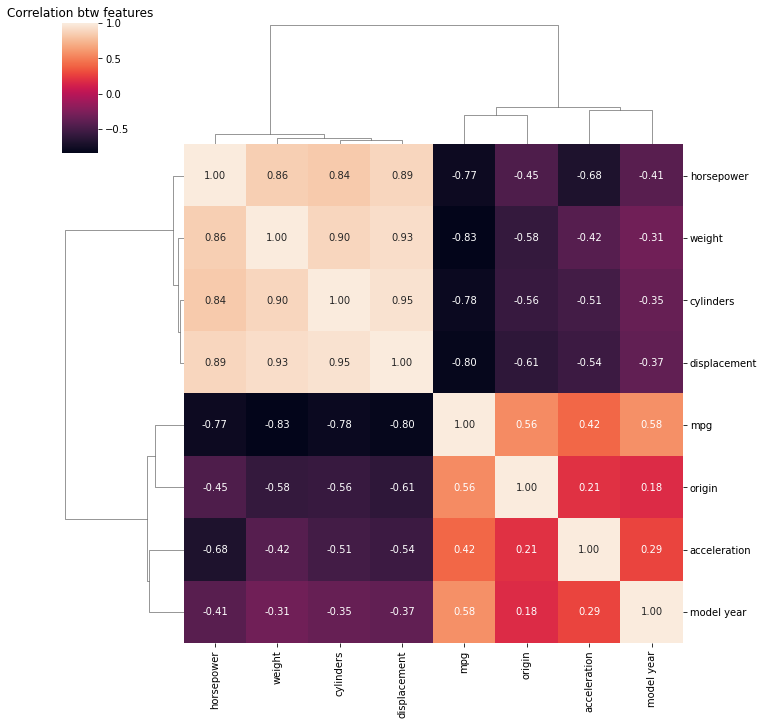

In [ ]:
corr_matrix = df1.corr()
sb.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

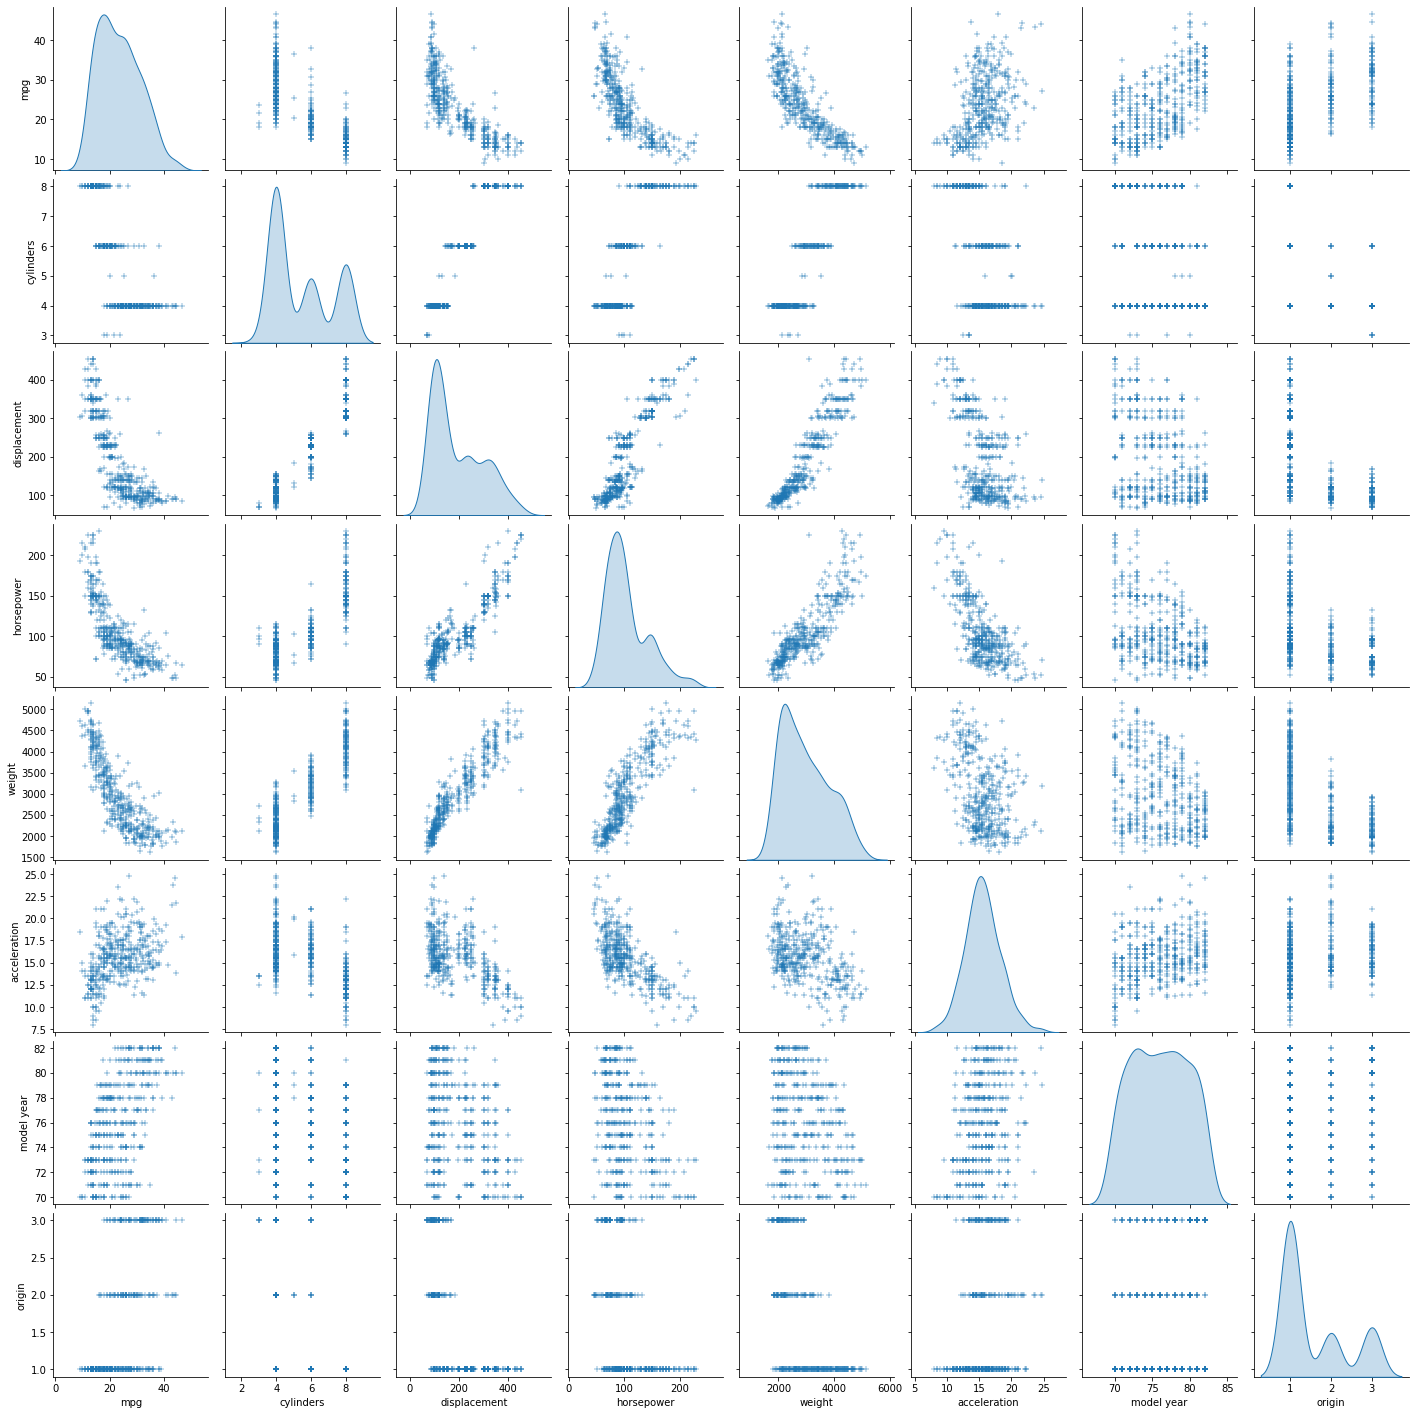

In [ ]:
#pair plot
sb.pairplot(df1, diag_kind = "kde", markers = "+")
plt.show()

# Observation: 
# 1. Distribution of cylinder with other variables suggest that cylinder is a categorical feature
# 2. Distribution of origin with other variables suggest that origin is a categorical feature
# 3. Data is highly skewed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
1    249
3     79
2     70
Name: origin, dtype: int64


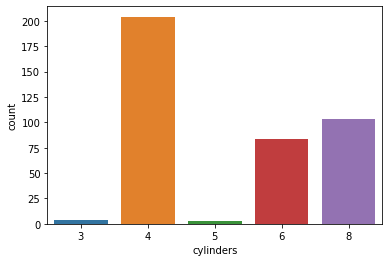

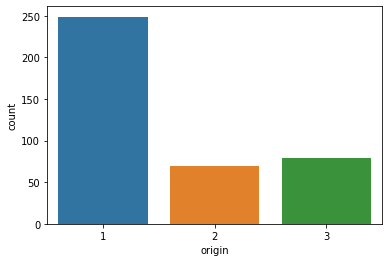

In [ ]:
plt.figure()
sb.countplot(df1["cylinders"])
print(df1["cylinders"].value_counts())

plt.figure()
sb.countplot(df1["origin"])
print(df1["origin"].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

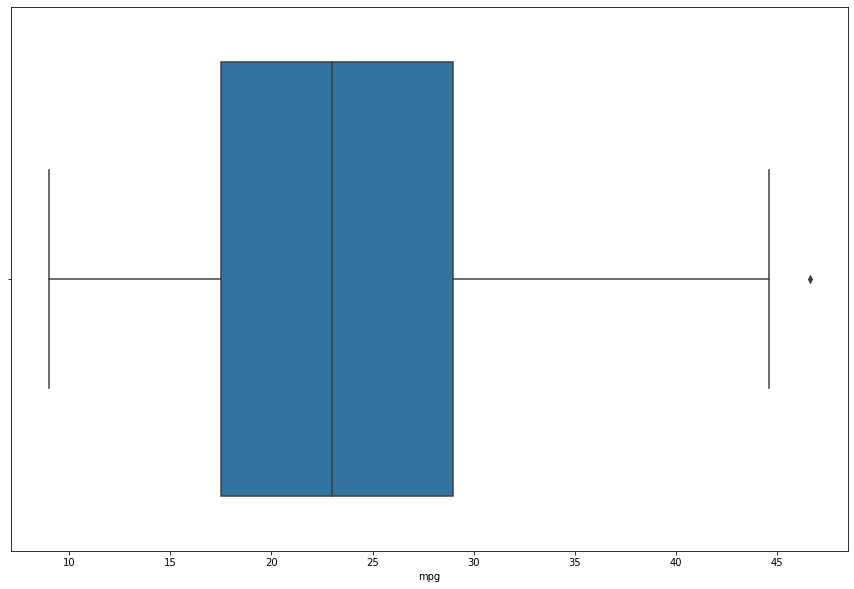

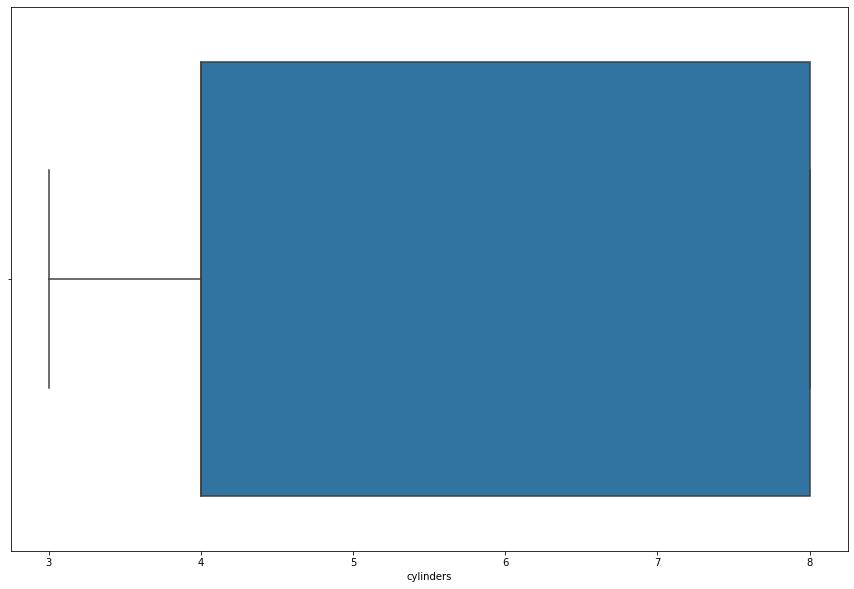

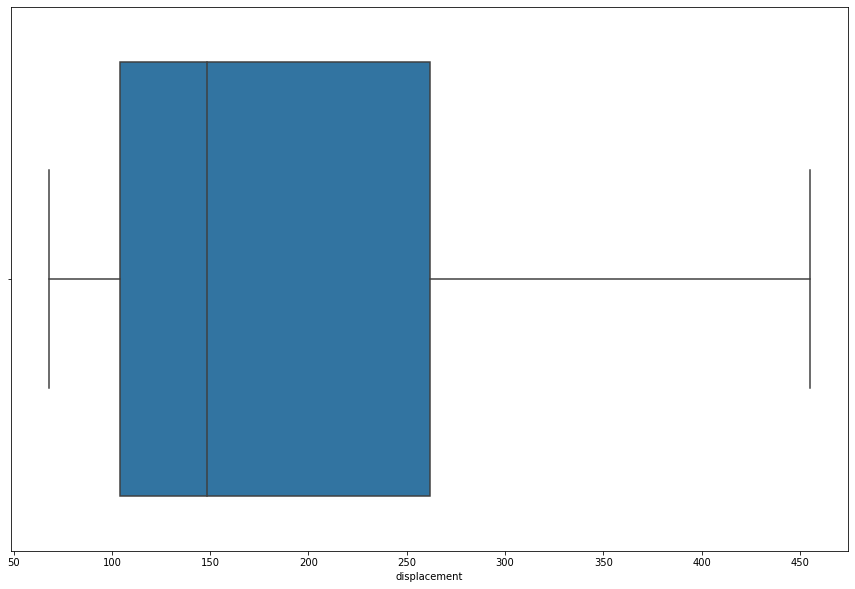

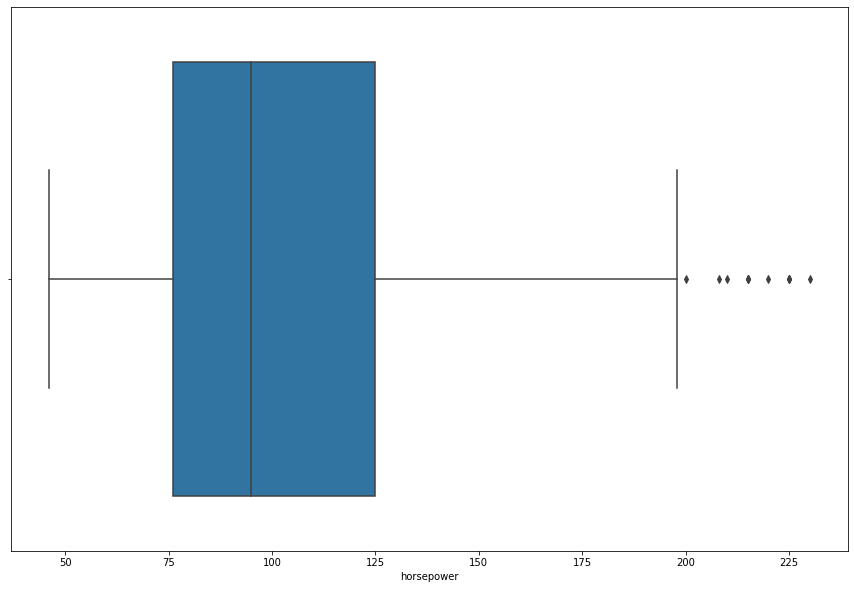

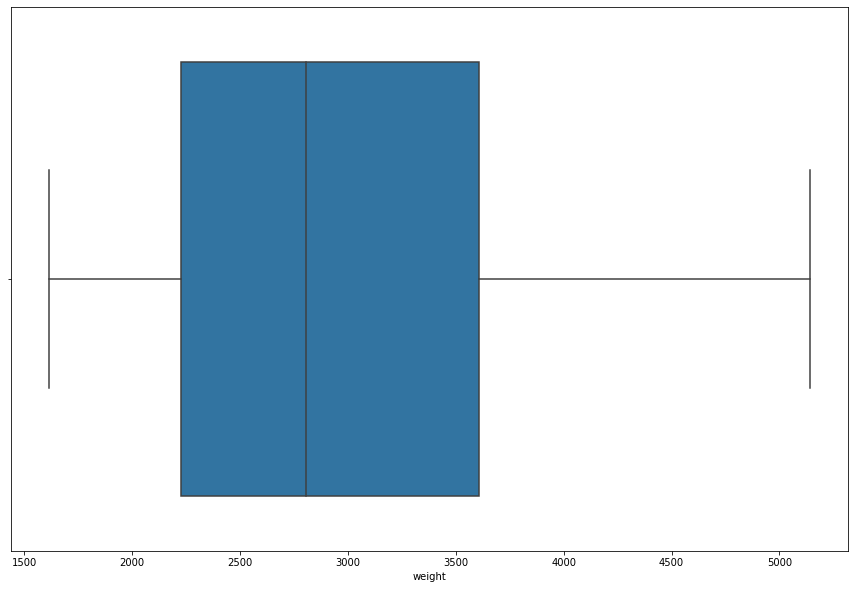

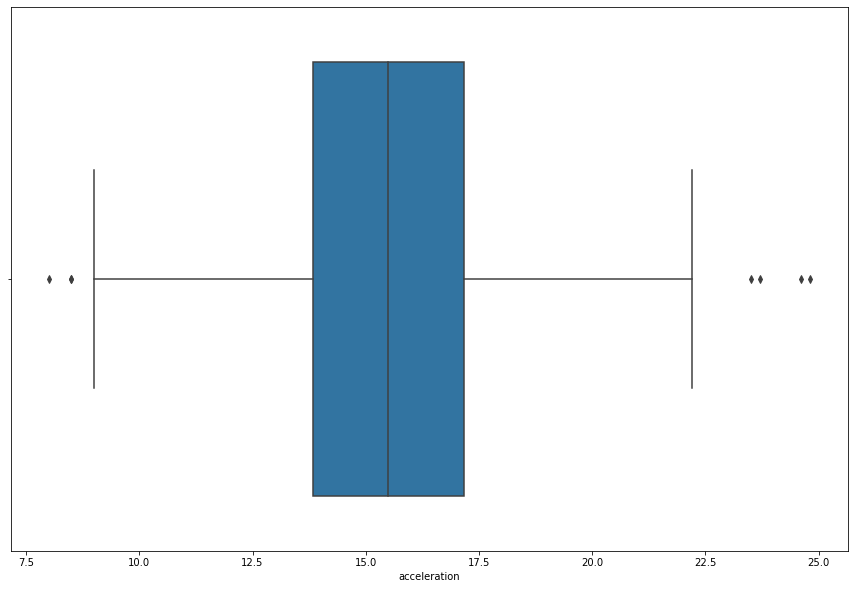

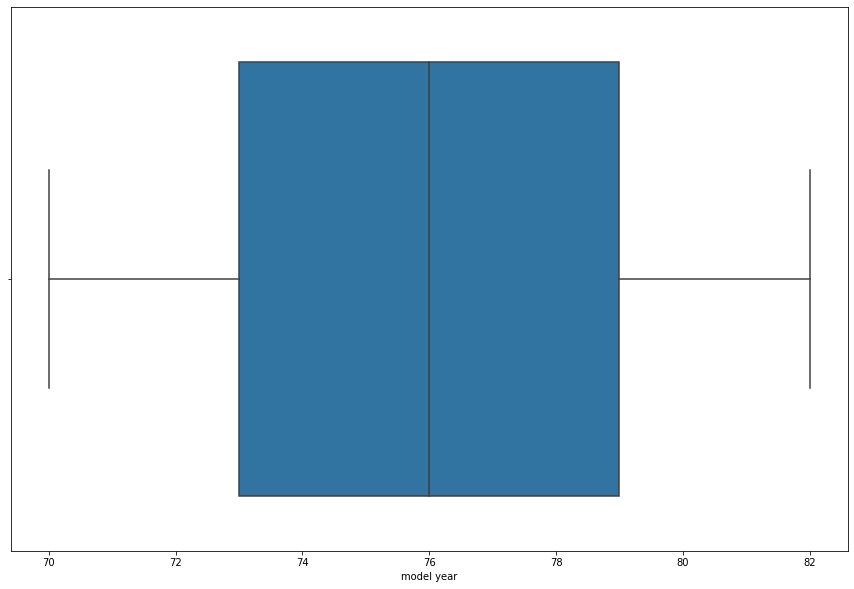

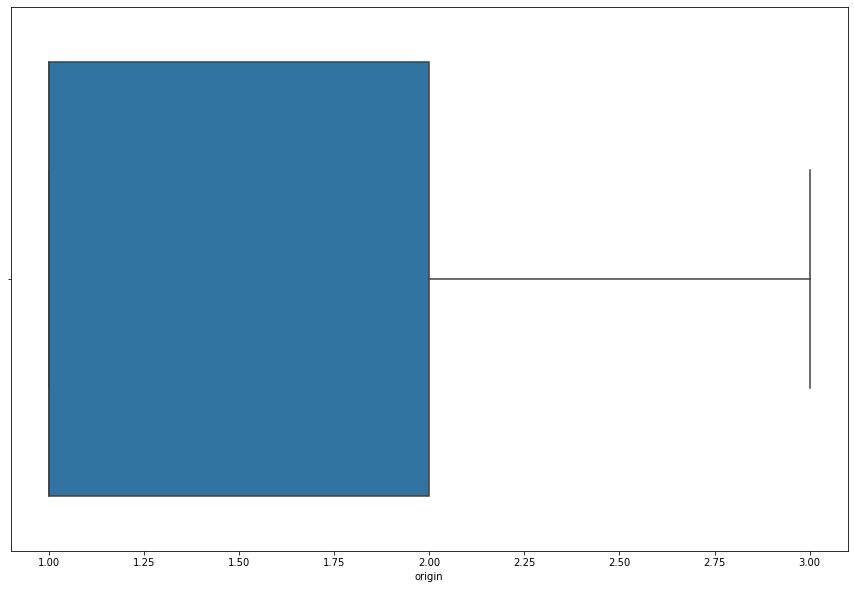

In [ ]:
# box plot of all features
for i in df1.columns:
    plt.figure(figsize=(15,10))
    sb.boxplot(x = i, data = df1, orient = "v")

# Observation: 
# 1. horsepower and acceleration feature have outliers

In [ ]:
#handling outliers

quartile1 = df1["horsepower"].quantile(0.25)
quartile3 = df1["horsepower"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range
filter_hp_low = low_limit < df1["horsepower"]
filter_hp_up = df1["horsepower"] < up_limit
filter_hp = filter_hp_low & filter_hp_up
df1 = df1[filter_hp]
df1


quartile1 = df1["acceleration"].quantile(0.25)
quartile3 = df1["acceleration"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range
filter_acc_low = low_limit < df1["acceleration"]
filter_acc_up = df1["acceleration"] < up_limit
filter_acc = filter_hp_low & filter_hp_up
df1 = df1[filter_acc]
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [ ]:
# log1p transformation of target variable

df1["mpg"] = np.log1p(df1["mpg"])

In [ ]:
from scipy.stats import skew 
skewed_feats = df1.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness


,skewed
origin,0.877245
horsepower,0.845446
displacement,0.704874
cylinders,0.600536
weight,0.564478
acceleration,0.377968
model year,-0.015764
mpg,-0.093043


In [ ]:
#converting categorical features to numeric using one hot encoding
df1.columns = df1.columns.str.strip()
df1["cylinders"] = df1["cylinders"].astype(str)  
df1["origin"] = df1["origin"].astype(str) 
df1 = pd.get_dummies(df1)


In [ ]:
df1

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,2.944439,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.332205,140.0,86.0,2790,15.6,82,0,1,0,0,0,1,0,0
394,3.806662,97.0,52.0,2130,24.6,82,0,1,0,0,0,0,1,0
395,3.496508,135.0,84.0,2295,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625,18.6,82,0,1,0,0,0,1,0,0


###Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV 

X = df1.drop(["mpg"], axis = 1)
y = df1.mpg

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
X

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,140.0,86.0,2790,15.6,82,0,1,0,0,0,1,0,0
394,97.0,52.0,2130,24.6,82,0,1,0,0,0,0,1,0
395,135.0,84.0,2295,11.6,82,0,1,0,0,0,1,0,0
396,120.0,79.0,2625,18.6,82,0,1,0,0,0,1,0,0


In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Build the model (use scikit learn)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

###Summarize the model.

In [ ]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Prediction

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.8828790706725413


### Evaluate the model

In [ ]:
#Coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8828790706725413

# Conclusion: 


1.   I understood logistic and linear regression and was able to implement it on a real world problem. 
2.   I learned that linear regression has no hyperparameters hence it cannot be tuned. 
3.   I also understood that to evaluate linear regression model, classification report is not supported as classification report is used where the prediction can be either right or wrong.  
4.   I learned to visualize the pair plot, identify the skewed features, and features that are categorical.
5. I also understood that performing logarithmic transformation on skewed variable helps in increasing the accuracy of the model.    

